In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Codec Performance

Saving Evaluation Performance Multiscale Plot


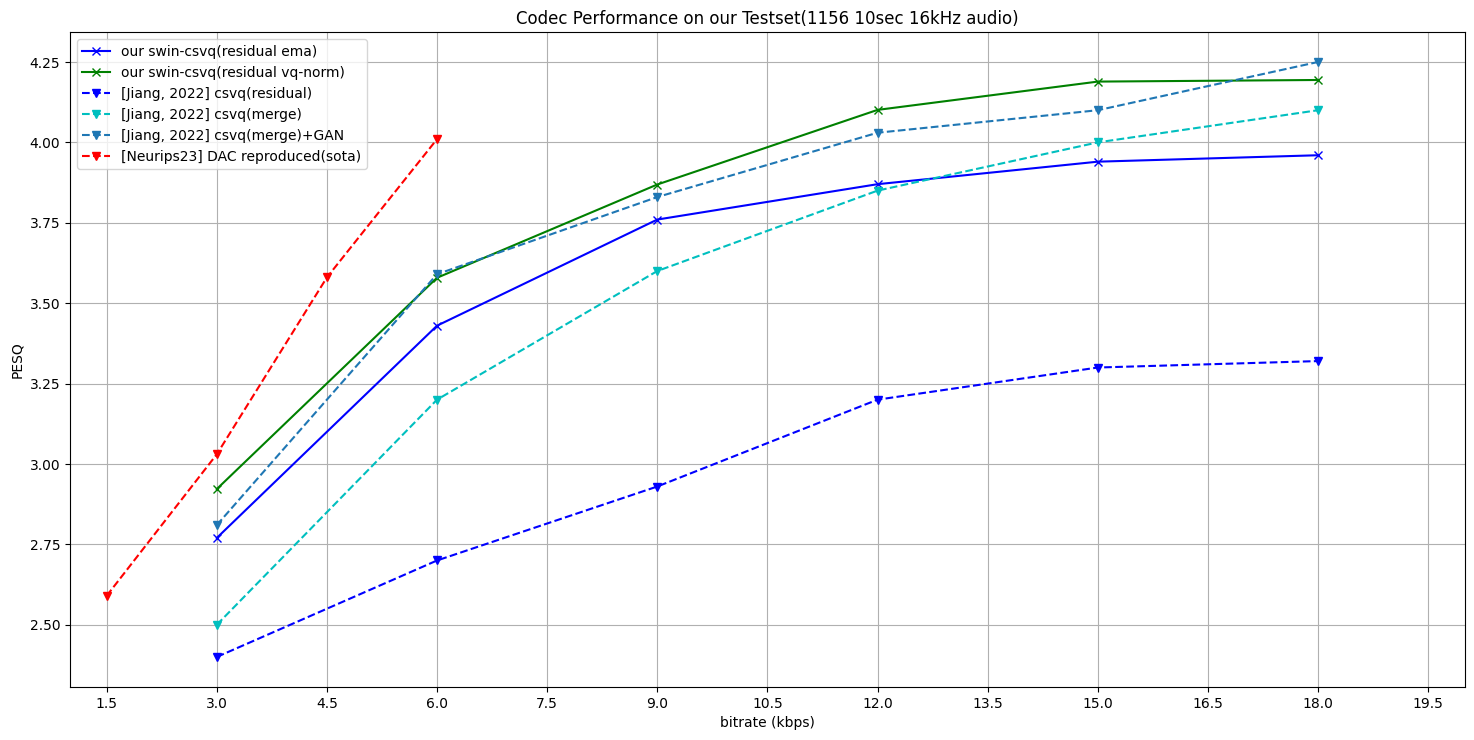

In [5]:
print("Saving Evaluation Performance Multiscale Plot")
csvq_residual = np.array([2.4, 2.7, 2.93, 3.2, 3.3, 3.32])
csvq_merge = np.array([2.5, 3.2, 3.6, 3.85, 4.0, 4.1])
csvq_merge_gan = np.array([2.81, 3.59, 3.83, 4.03, 4.1, 4.25])


swin_csvq_residual_ema = np.array([2.77, 3.43, 3.76, 3.87, 3.94, 3.96]) # with no vq normalization, but trained by ema
swin_csvq_residual_baseline = np.array([2.922, 3.579, 3.869, 4.101, 4.189, 4.194]) # with vq normalization
swin_csvq_residual_vq_control = np.array([]) # with no vq normalization


plt.figure(figsize=(18,8.5))
plt.title("Codec Performance on our Testset(1156 10sec 16kHz audio)")
plt.xlim((1,20))
plt.xticks(np.arange(1.5,21,1.5))

# Ours
plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_ema), marker='x', color='blue', label="our swin-csvq(residual ema)")
plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_baseline), marker='x', color='green', label="our swin-csvq(residual vq-norm)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_vq_control), marker='x', color='blue', label="our swin-csvq(residual no ema)")


# CSVQ Source Paper
plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_residual, linestyle='--', marker='v', color='blue', label="[Jiang, 2022] csvq(residual)")
plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge, linestyle='--', marker='v', color='c', label="[Jiang, 2022] csvq(merge)")
plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge_gan, linestyle='--', marker='v', color='tab:blue', label="[Jiang, 2022] csvq(merge)+GAN")

# DAC (sota)
dac = np.array([2.59, 3.03, 3.58, 4.01])
dac_bps = np.array([1.5, 3, 4.5, 6])
plt.plot(dac_bps, dac, linestyle='--', marker='v', color='red', label="[Neurips23] DAC reproduced(sota)")

plt.xlabel("bitrate (kbps)")
plt.ylabel("PESQ")
plt.grid()
plt.legend()
# plt.savefig(f"../assets/test_result_curve.jpg", dpi=200, bbox_inches='tight', pad_inches=.5)

plt.show()

### Codec VQ Evaluation

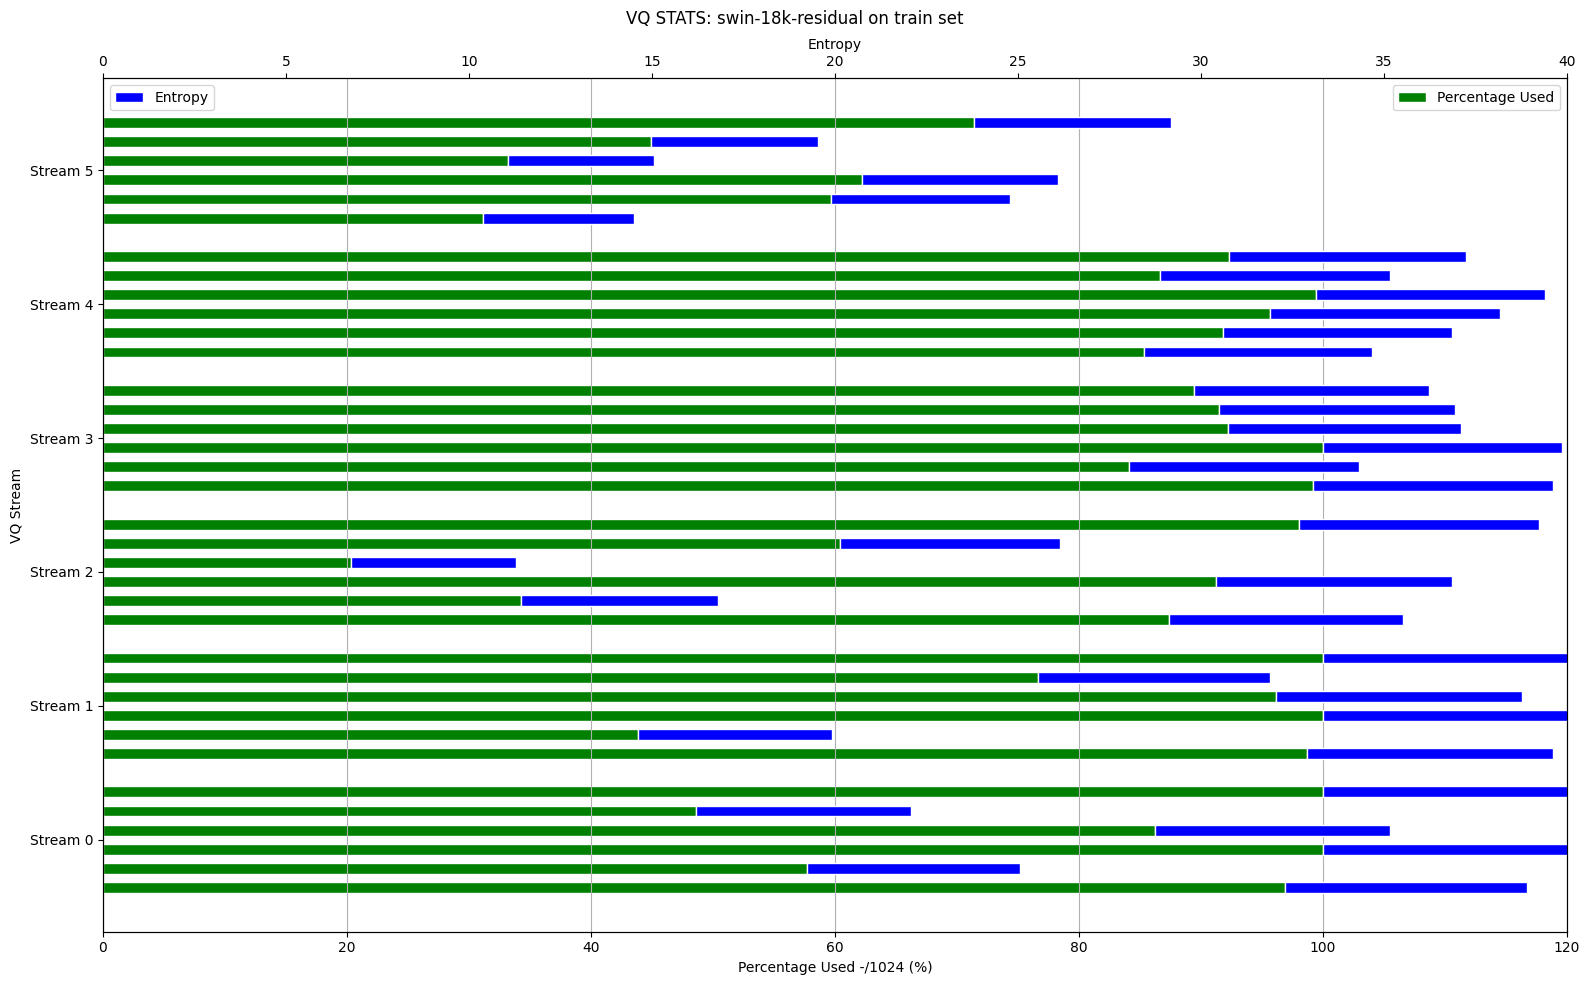

In [1]:
from run_vq_stats import visualize
import json

# Trainset

eval_model = "swin-18k-residual"
split = "train"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")

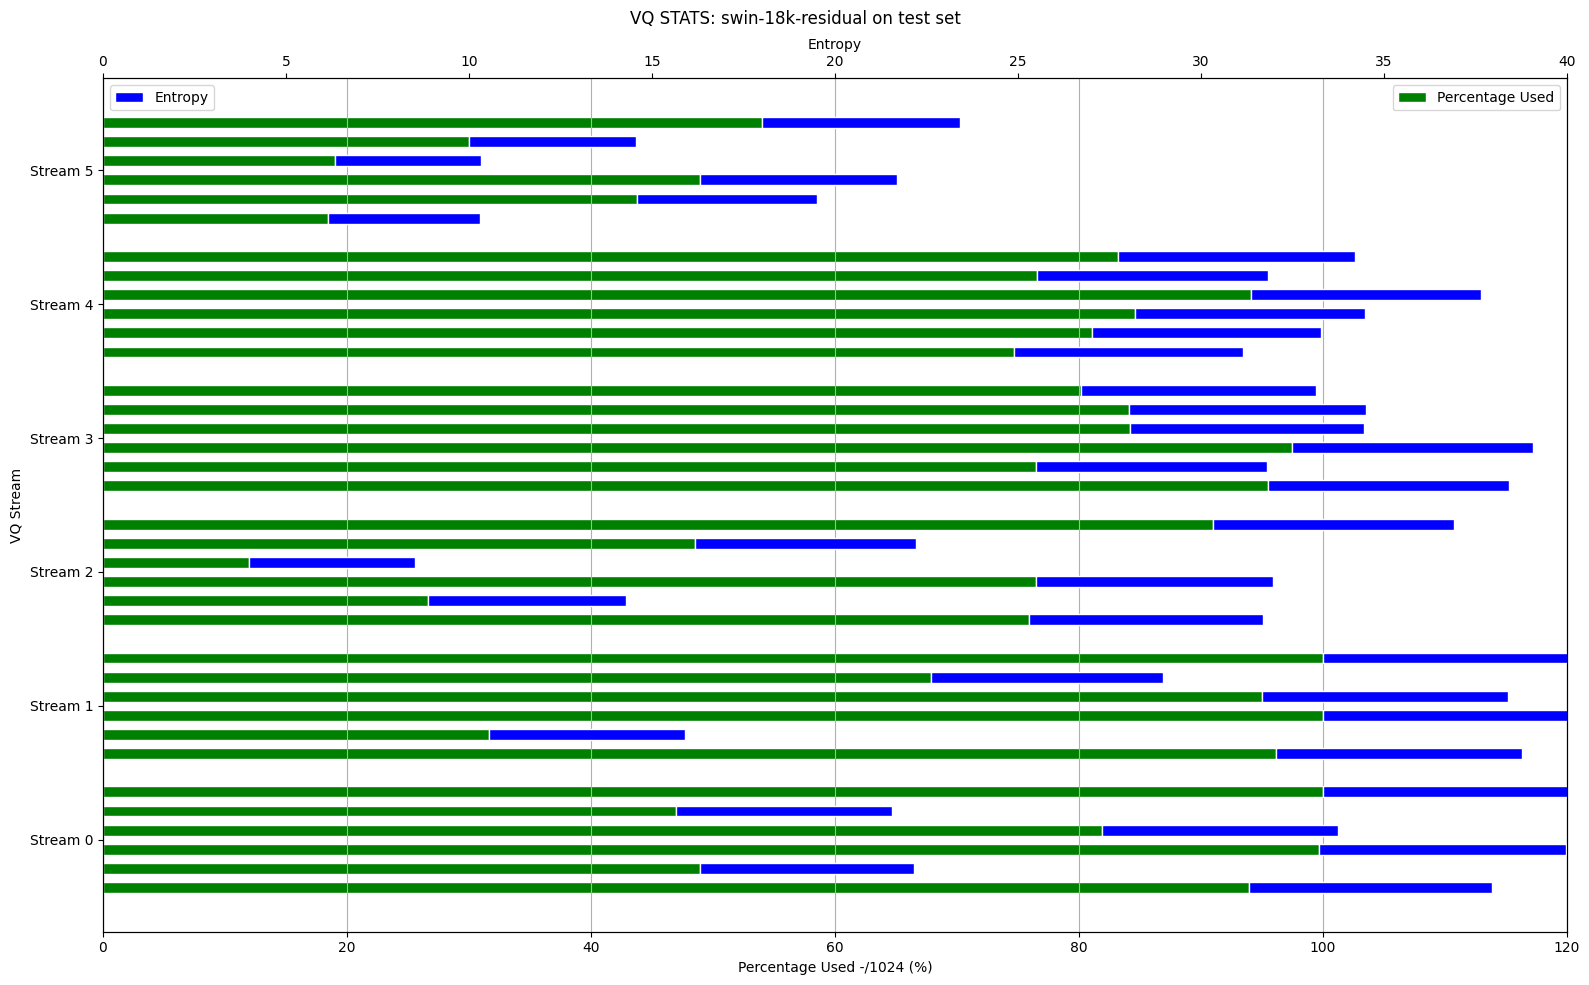

In [2]:
# Testset
eval_model = "swin-18k-residual"
split = "test"

entropy_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/entropy.json", "r"))
usage_stats = json.load(open(f"../assets/results/{eval_model}/vq_stats/{split}/usage.json", "r"))

visualize(entropy_stats, usage_stats, title=f"VQ STATS: {eval_model} on {split} set")